# Script for crafting Adversarial Examples

## Perturbation Methods
#### 1. leet speak & unicode
#### 2. typos
#### 3. punctuation marks

In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import utils.text_processing as tp

In [2]:
# get data from important word detector
%store -r important_words
%store -r sentence_packages

## M3th0d 1: 133t 5p34k

#### 1. Create modified Dataset

In [3]:
original_sentences = []
for sentence in sentence_packages:
    original_sentences.append(sentence['original_sentence'])

In [4]:
modified_words = []
for word in important_words:
    modified_words.append(tp.to_leet(word))

In [5]:
modified_sentences = tp.generate_modified_sentences(original_sentences, important_words, modified_words)

#### 2. Import BERT Model

In [6]:
import torch
import random

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model.eval();

#### 3. Prediction

In [7]:
original_predictions = []
for sentence in original_sentences:
    original_predictions.append(tp.predict_sentiment(model, tokenizer, sentence))

In [8]:
modified_predictions = []
for sentence in modified_sentences:
    modified_predictions.append(tp.predict_sentiment(model, tokenizer, sentence))

#### 4. Creation of Dataset

In [9]:
ds = pd.DataFrame(list(zip(original_sentences, original_predictions, modified_sentences, modified_predictions)),
                 columns = ['original_sentence', 'original_prediction', 'modified_sentence', 'modified_prediction'])

In [10]:
ds.head()

,original_sentence,original_prediction,modified_sentence,modified_prediction
0,I visited this b&b during a short trip to ride...,4,I visited this b&b during a short trip to ride...,4
1,"The owners were really lovely people, the room...",4,"The owners were really lovely people, the room...",4
2,It is in a really good location for riding or ...,3,It is in a really good location for riding or ...,4
3,I cannot recommend this place enough!.,0,I c4nn0t recommend this place enough!.,4
4,3 friends and I visited 't Materke in April 20...,4,3 friends and I visited 't Materke in April 20...,4


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   original_sentence    435 non-null    object
 1   original_prediction  435 non-null    int64 
 2   modified_sentence    435 non-null    object
 3   modified_prediction  435 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ KB


#### 5. Creation of adversarial Dataset

In [12]:
advds = tp.filter_unchanged_predictions(ds)

83 Sentences are missclassified after applying leet speak

In [13]:
advds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 431
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   original_sentence    183 non-null    object
 1   original_prediction  183 non-null    int64 
 2   modified_sentence    183 non-null    object
 3   modified_prediction  183 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


In [14]:
 advds.to_json(r'data/adversarial_dataset_l33t.json', orient='records')

#### 5. Resluts

In [15]:
pmethod = 'leet speak'

In [16]:
results_leet = tp.generate_results_df(pmethod, ds, advds)
results_leet

,0
Perturbation Method,leet speak
Tokenizer,nlptown/bert-base-multilingual-uncased-sentiment
Model,nlptown/bert-base-multilingual-uncased-sentiment
Dataset,TripAdvisor Hotel Reviews
Output lables,Range from 0 to 4 - 0 = NEG; 4 = POS
Items in original dataset,435
Items in adversarial dataset,183
Percentage,42.069


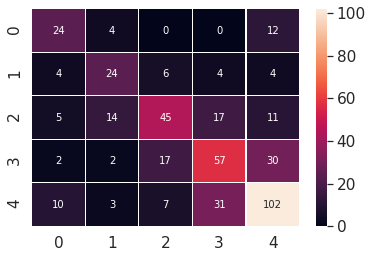

In [39]:
array = confusion_matrix(original_predictions, modified_predictions)
df_cm = pd.DataFrame(array, range(5), range(5))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt="d", linewidths=.1) # font size

plt.show()